# Page Rank Algorithm
#### Algorithm:
<ol>
    <li>Initialize page rank of every node with value = 1</li>
    <li>For each iteration, update the page rank of every node in the graph</li>
    <li>The new page rank is the sum of the proportional rank of all its parents</li>
    <li>Apply random walk to the new page rank</li>
    <li>Page rank value will converge adter enough iterations</li>
    

In [10]:
#intializing PageRank Value
import os

class Node:
    def __init__(self):
        #self.name = name
        self.children = []
        self.parents = []
        self.auth = 1.0
        self.hub = 1.0
        self.pagerank = 1.0
    
    def PageRank_one_iter(graph, d):
        node_list = graph.nodes
        for node in node_list:
            node.update_pagerank(d, len(graph.nodes))
            
    def update_pagerank(self, d, n):
        in_neighbours = self.parents
        pagerank_sum = sum((node.pagerank/len(node.children)) for node in in_neighbors)
        random_walk = d/n
        self.pagerank = random_walk + (1-d)*pagerank_sum
    def init_graph(fname):
        with open(fname) as f:
            lines = f.readlines()

In [11]:
if __name__ == "__main__":
    a = Node()
    data = a.init_graph('./dataset/graph_4.txt')
    a.PageRank_one_iter(data, 0.15)

TypeError: init_graph() takes 1 positional argument but 2 were given

In [18]:
from sklearn.metrics import roc_auc_score
y =[]
probs = [0.3,0.67,0.67,0.3]
for i in range(len(probs)):
    if probs[i]>0.5:
        y[i] = True
    

auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)

IndexError: list assignment index out of range

In [6]:
!pip install scikit-learn

In [44]:
def katz_centrality(G, alpha=0.1, beta=1.0, 
					max_iter=10000, tol=1.0e-6, 
					nstart=None, normalized=True, 
					weight = 'weight'): 
	"""Compute the Katz centrality for the nodes 
		of the graph G. 


	Katz centrality computes the centrality for a node 
	based on the centrality of its neighbors. It is a 
	generalization of the eigenvector centrality. The 
	Katz centrality for node `i` is 

	.. math:: 

		x_i = \alpha \sum_{j} A_{ij} x_j + \beta, 

	where `A` is the adjacency matrix of the graph G 
	with eigenvalues `\lambda`. 

	The parameter `\beta` controls the initial centrality and 

	.. math:: 

		\alpha < \frac{1}{\lambda_{max}}. 


	Katz centrality computes the relative influence of 
	a node within a network by measuring the number of 
	the immediate neighbors (first degree nodes) and 
	also all other nodes in the network that connect 
	to the node under consideration through these 
	immediate neighbors. 

	Extra weight can be provided to immediate neighbors 
	through the parameter :math:`\beta`. Connections 
	made with distant neighbors are, however, penalized 
	by an attenuation factor `\alpha` which should be 
	strictly less than the inverse largest eigenvalue 
	of the adjacency matrix in order for the Katz 
	centrality to be computed correctly. 


	Parameters 
	---------- 
	G : graph 
	A NetworkX graph 

	alpha : float 
	Attenuation factor 

	beta : scalar or dictionary, optional (default=1.0) 
	Weight attributed to the immediate neighborhood. 
	If not a scalar, the dictionary must have an value 
	for every node. 

	max_iter : integer, optional (default=1000) 
	Maximum number of iterations in power method. 

	tol : float, optional (default=1.0e-6) 
	Error tolerance used to check convergence in 
	power method iteration. 

	nstart : dictionary, optional 
	Starting value of Katz iteration for each node. 

	normalized : bool, optional (default=True) 
	If True normalize the resulting values. 

	weight : None or string, optional 
	If None, all edge weights are considered equal. 
	Otherwise holds the name of the edge attribute 
	used as weight. 

	Returns 
	------- 
	nodes : dictionary 
	Dictionary of nodes with Katz centrality as 
	the value. 

	Raises 
	------ 
	NetworkXError 
	If the parameter `beta` is not a scalar but 
	lacks a value for at least one node 

	

	Notes 
	----- 
	
	This algorithm it uses the power method to find 
	the eigenvector corresponding to the largest 
	eigenvalue of the adjacency matrix of G. 
	The constant alpha should be strictly less than 
	the inverse of largest eigenvalue of the adjacency 
	matrix for the algorithm to converge. 
	The iteration will stop after max_iter iterations 
	or an error tolerance ofnumber_of_nodes(G)*tol 
	has been reached. 

	When `\alpha = 1/\lambda_{max}` and `\beta=0`, 
	Katz centrality is the same as eigenvector centrality. 

	For directed graphs this finds "left" eigenvectors 
	which corresponds to the in-edges in the graph. 
	For out-edges Katz centrality first reverse the 
	graph with G.reverse(). 

	
	"""
	from math import sqrt 

	if len(G) == 0: 
		return {} 

	nnodes = G.number_of_nodes() 

	if nstart is None: 

		# choose starting vector with entries of 0 
		x = dict([(n,0) for n in G]) 
	else: 
		x = nstart 

	try: 
		b = dict.fromkeys(G,float(beta)) 
	except (TypeError,ValueError,AttributeError): 
		b = beta 
		if set(beta) != set(G): 
			raise nx.NetworkXError('beta dictionary '
								'must have a value for every node') 

	# make up to max_iter iterations 
	for i in range(max_iter): 
		xlast = x 
		x = dict.fromkeys(xlast, 0) 

		# do the multiplication y^T = Alpha * x^T A - Beta 
		for n in x: 
			for nbr in G[n]: 
				x[nbr] += xlast[n] * G[n][nbr].get(weight, 1) 
		for n in x: 
			x[n] = alpha*x[n] + b[n] 

		# check convergence 
		err = sum([abs(x[n]-xlast[n]) for n in x]) 
		if err < nnodes*tol: 
			if normalized: 

				# normalize vector 
				try: 
					s = 1.0/sqrt(sum(v**2 for v in x.values())) 

				# this should never be zero? 
				except ZeroDivisionError: 
					s = 1.0
			else: 
				s = 1
			for n in x: 
				x[n] *= s 
			return x 

	raise nx.NetworkXError('Power iteration failed to converge in '
						'%d iterations.' % max_iter) 


In [47]:
import networkx as nx 
import math 
print(G)
phi = (1+math.sqrt(5))/2.0 # largest eigenvalue of adj matrix 
centrality = nx.katz_centrality(G1) 
for n,c in sorted(centrality.items()): 
        print("%d %0.2f"%(n,c)) 



0 0.25
1 0.28
2 0.28
3 0.28
4 0.28
5 0.28
6 0.28
7 0.28
8 0.29
9 0.33
10 0.26
11 0.26
12 0.26


In [43]:
!pip install networkx

Add node: foo
Add node: b
Add node: a
Add node: r
Add node: b
Add node: a
Add node: r
Remove node: b
Remove node: a
Remove node: r
Nodes in G:  [(0, {'attr_dict': None}), (1, {}), (2, {}), (3, {}), (4, {}), (5, {}), (6, {}), (7, {}), (8, {}), (9, {'attr_dict': None}), (10, {}), (11, {}), (12, {})]
Add edge: 0-1
Add edge: 1-5
Add edge: 2-5
Edges in G:  [(0, 1, {'attr_dict': None}), (1, 2, {'attr_dict': None}), (2, 3, {'attr_dict': None}), (3, 4, {'attr_dict': None}), (4, 5, {'attr_dict': None}), (5, 6, {'attr_dict': None}), (6, 7, {'attr_dict': None}), (7, 8, {'attr_dict': None}), (8, 9, {'attr_dict': None}), (9, 10, {'attr_dict': None}), (9, 11, {'attr_dict': None}), (9, 12, {'attr_dict': None})]
Remove edge: 0-1
Add edge: 0-1
Add edge: 1-2
Add edge: 2-3
Edges in G:  [(0, 1, {'attr_dict': None}), (1, 2, {'attr_dict': None}), (2, 3, {'attr_dict': None}), (3, 4, {'attr_dict': None}), (4, 5, {'attr_dict': None}), (5, 6, {'attr_dict': None}), (6, 7, {'attr_dict': None}), (7, 8, {'attr_dict

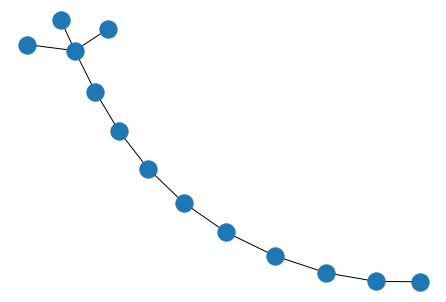

In [48]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx import Graph


class PrintGraph(Graph):
    """
    Example subclass of the Graph class.

    Prints activity log to file or standard output.
    """

    def __init__(self, data=None, name="", file=None, **attr):
        Graph.__init__(self, data=data, name=name, **attr)
        if file is None:
            import sys

            self.fh = sys.stdout
        else:
            self.fh = open(file, "w")

    def add_node(self, n, attr_dict=None, **attr):
        Graph.add_node(self, n, attr_dict=attr_dict, **attr)
        self.fh.write(f"Add node: {n}\n")

    def add_nodes_from(self, nodes, **attr):
        for n in nodes:
            self.add_node(n, **attr)

    def remove_node(self, n):
        Graph.remove_node(self, n)
        self.fh.write(f"Remove node: {n}\n")

    def remove_nodes_from(self, nodes):
        for n in nodes:
            self.remove_node(n)

    def add_edge(self, u, v, attr_dict=None, **attr):
        Graph.add_edge(self, u, v, attr_dict=attr_dict, **attr)
        self.fh.write(f"Add edge: {u}-{v}\n")

    def add_edges_from(self, ebunch, attr_dict=None, **attr):
        for e in ebunch:
            u, v = e[0:2]
            self.add_edge(u, v, attr_dict=attr_dict, **attr)

    def remove_edge(self, u, v):
        Graph.remove_edge(self, u, v)
        self.fh.write(f"Remove edge: {u}-{v}\n")

    def remove_edges_from(self, ebunch):
        for e in ebunch:
            u, v = e[0:2]
            self.remove_edge(u, v)

    def clear(self):
        Graph.clear(self)
        self.fh.write("Clear graph\n")


G1 = PrintGraph()
G1.add_node("foo")
G1.add_nodes_from("bar", weight=8)
G1.add_nodes_from("bar", weight=8)
G1.remove_node("b")
G1.remove_nodes_from("ar")
print("Nodes in G: ", G.nodes(data=True))
G1.add_edge(0, 1, weight=10)
G1.add_edge(1, 5, weight=10)
G1.add_edge(2, 5, weight=10)
print("Edges in G: ", G.edges(data=True))
G1.remove_edge(0, 1)
G1.add_edges_from(zip(range(0, 3), range(1, 4)), weight=10)
print("Edges in G: ", G.edges(data=True))
G1.remove_edges_from(zip(range(0, 3), range(1, 4)))
print("Edges in G: ", G.edges(data=True))

G1 = PrintGraph()
nx.add_path(G1, range(10))
nx.add_star(G1, range(9, 13))
nx.add_star(G1, range(9, 13))
nx.draw(G1)